# KNN classifier

Important hyperparameters are:
    
1. n_neighbors
2. algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
3. p

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn import datasets

#Reading the CSV file and storing it in the data frame object named df

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",names=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','class'])

In [2]:
#Handling
del df['Fe']
del df['Ba']

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,class
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1
...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,7


In [4]:
n= df.shape[0]  ## n denotes no. of rows or data instances
print(n)

214


In [5]:
from sklearn import tree

y = df['class']
X = df.drop('class',axis=1)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

## Hyperparameters n_neighbours variation

Text(0, 0.5, 'Accuracy')

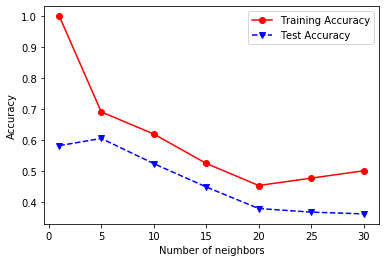

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

### Number of neighbours 5 give maximum accuracy

## Hyperparameters Algorithm variation

Text(0, 0.5, 'Accuracy')

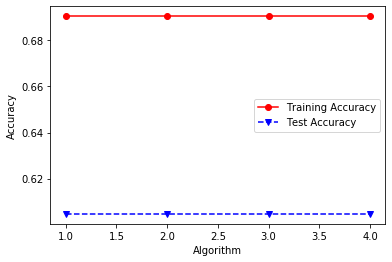

In [8]:
# Model fitting and evaluation

index = 0
algorithm = ['auto','ball_tree','kd_tree','brute']
maxtype=[1,2,3,4]

trainAcc = np.zeros(len(maxtype))
testAcc = np.zeros(len(maxtype))

for d in algorithm :
    clf = KNeighborsClassifier(algorithm=d,n_neighbors=5, metric='minkowski', p=2)
    clf = clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1
    
# Plot of training and test accuracies
    
plt.plot(maxtype,trainAcc,'ro-',maxtype,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')

## All algorithms give same test accuracy

## Hyperparameter p changing

Text(0, 0.5, 'Accuracy')

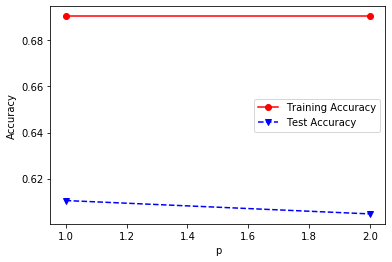

In [9]:
# Model fitting and evaluation

index = 0
p = [1,2]
maxtype=[1,2]

trainAcc = np.zeros(len(maxtype))
testAcc = np.zeros(len(maxtype))

for d in p :
    clf = KNeighborsClassifier(algorithm='auto',n_neighbors=5, metric='minkowski', p=d)
    clf = clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1
    
# Plot of training and test accuracies
    
plt.plot(maxtype,trainAcc,'ro-',maxtype,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('p')
plt.ylabel('Accuracy')

### p=1 more accuracy

# K fold cross validation

In [10]:
## for k=5 there is maximum test set accuracy

## making our folds
## Randomly Shuffle the data
df=df.sample(frac=1)

k = 10
folds = np.array_split(df, k)

## function to perform our accuracy testing

def perform(Train, test):
    # remove labels from data
    """
    train_labels = train_set.pop('class').values
    test_labels = test_set.pop('class').values
    clf.fit(train_set, train_labels)
    
    print("Accuracy Score is:",clf.score(test_set, test_labels))
    """
    
    X_train=Train.values[:,:7]
    X_test=Train.values[:,7]
    y_train=test.values[:,:7]
    y_test=test.values[:,7]
    
    gnb = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
    gnb.fit(X_train,X_test)
    y_pred=gnb.predict(y_train)  # getting predictions from the classifier
    
    
    print("Accuracy score is :",accuracy_score(y_test,y_pred),'\n') # calculating accuracy
    print("Confusion Matrix is :\n\n",confusion_matrix(y_test,y_pred))
    print("\nClassification Report is as follows :\n")
    print(classification_report(y_test,y_pred))

for i in range(k):
    train = folds.copy() ##you wanna work on a copy of your array
    test = folds[i]
    del train[i]
    train = pd.concat(train, sort=False)
    print("Test set is fold number :",i+1)
    perform(train.copy(), test.copy()) ##do the fitting, here you also want to copy
    print("------------------------------------------------------------------------------------------")
    
##In this function you remove the label column from your sets and fit the scikit-classifier (clf) and then return the prediction.



Test set is fold number : 1
Accuracy score is : 0.45454545454545453 

Confusion Matrix is :

 [[2 2 0 0 0 0]
 [1 3 0 0 1 0]
 [5 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 5]]

Classification Report is as follows :

              precision    recall  f1-score   support

         1.0       0.25      0.50      0.33         4
         2.0       0.38      0.60      0.46         5
         3.0       0.00      0.00      0.00         5
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         1
         7.0       1.00      0.83      0.91         6

    accuracy                           0.45        22
   macro avg       0.27      0.32      0.28        22
weighted avg       0.40      0.45      0.41        22

------------------------------------------------------------------------------------------
Test set is fold number : 2
Accuracy score is : 0.8181818181818182 

Confusion Matrix is :

 [[8 0 0 0 0 0]
 [0 5 0 1 0 0]
 [1 0 1 0 0 0]
 [0

C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIBHU GOYAL\anaconda3\lib\site-packa